In [1]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.datasets import make_moons
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df = df.drop(columns=['id'])
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
#take first 10 columns
df = df.iloc[:, :16]
df.isnull().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
radius_se                 0
texture_se                0
perimeter_se              0
area_se                   0
smoothness_se             0
dtype: int64

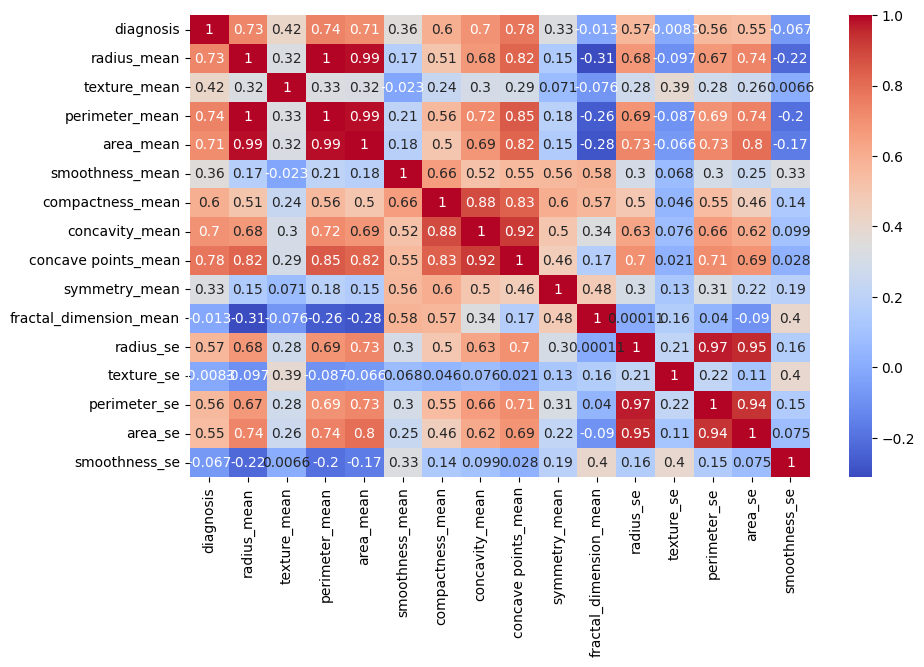

In [4]:
#heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [5]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se'],
      dtype='object')

# Linear data

In [6]:
X = df.drop(columns=['diagnosis','texture_mean','smoothness_mean','symmetry_mean','fractal_dimension_mean',
'smoothness_se'])
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = []
predictions = []
accuracies = []
for kernel in kernels:
    if kernel == 'poly':
        model = svm.SVC(kernel=kernel, degree=3)
    else:
        model = svm.SVC(kernel=kernel) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    models.append(model)
    predictions.append(y_pred)
    accuracies.append(accuracy_score(y_test, y_pred))
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred))

Kernel: linear
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Kernel: poly
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        71
           1       1.00      0.63      0.77        43

    accuracy                           0.86       114
   macro avg       0.91      0.81      0.84       114
weighted avg       0.89      0.86      0.85       114

Kernel: rbf
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94 

(0.0, 1.0)

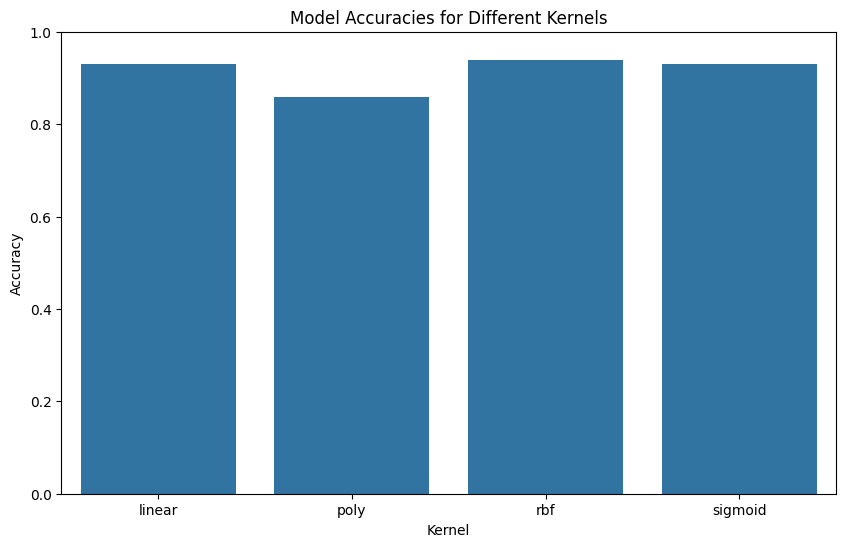

In [9]:
#bar plot of accuracies
plt.figure(figsize=(10,6))
sns.barplot(x=kernels, y=accuracies)
plt.title('Model Accuracies for Different Kernels')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.ylim(0,1)

# non linear

In [10]:
X = df[['symmetry_mean','fractal_dimension_mean',
'texture_se','smoothness_se']]
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = []
predictions = []
accuracies = []
for kernel in kernels:
    if kernel == 'poly':
        model = svm.SVC(kernel=kernel, degree=3)
    else:
        model = svm.SVC(kernel=kernel) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    models.append(model)
    predictions.append(y_pred)
    accuracies.append(accuracy_score(y_test, y_pred))
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred))

Kernel: linear
              precision    recall  f1-score   support

           0       0.70      0.89      0.78        71
           1       0.67      0.37      0.48        43

    accuracy                           0.69       114
   macro avg       0.68      0.63      0.63       114
weighted avg       0.69      0.69      0.67       114

Kernel: poly
              precision    recall  f1-score   support

           0       0.64      0.99      0.78        71
           1       0.80      0.09      0.17        43

    accuracy                           0.65       114
   macro avg       0.72      0.54      0.47       114
weighted avg       0.70      0.65      0.55       114

Kernel: rbf
              precision    recall  f1-score   support

           0       0.70      0.92      0.79        71
           1       0.71      0.35      0.47        43

    accuracy                           0.70       114
   macro avg       0.71      0.63      0.63       114
weighted avg       0.70      0.70 

(0.0, 1.0)

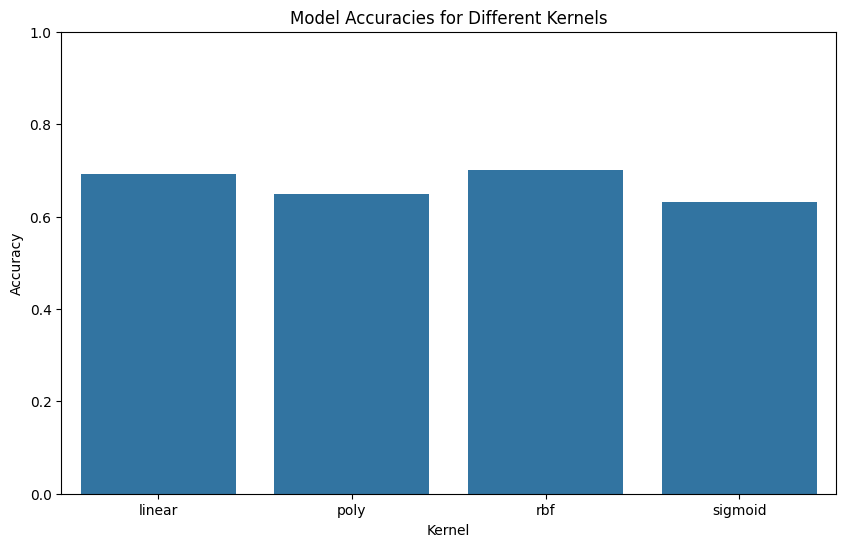

In [13]:
#bar plot of accuracies
plt.figure(figsize=(10,6))
sns.barplot(x=kernels, y=accuracies)
plt.title('Model Accuracies for Different Kernels')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.ylim(0,1)

# moons

In [14]:
X, y = make_moons(n_samples=2000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Kernel: linear
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       197
           1       0.86      0.87      0.86       203

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



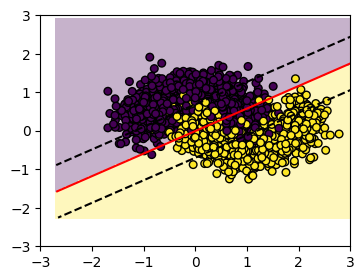

Kernel: poly
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       197
           1       0.86      0.87      0.86       203

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



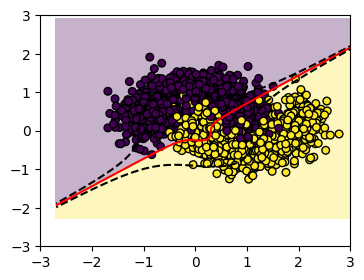

Kernel: rbf
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       197
           1       0.92      0.90      0.91       203

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



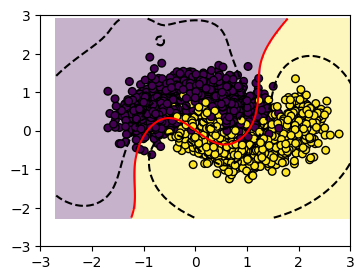

Kernel: sigmoid
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       197
           1       0.67      0.71      0.69       203

    accuracy                           0.68       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.68      0.68      0.68       400



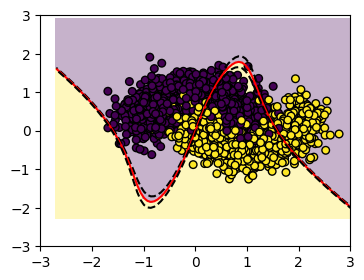

In [16]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = []
predictions = []
accuracies = []
for kernel in kernels:
    if kernel == 'poly':
        model = svm.SVC(kernel=kernel, degree=3)
    else:
        model = svm.SVC(kernel=kernel) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    models.append(model)
    predictions.append(y_pred)
    accuracies.append(accuracy_score(y_test, y_pred))
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred))
    ax=None
    long_title=True
    support_vectors=False
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 3))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": model, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "red", "k"],
        linestyles=["--", "-", "--"],
    )

    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    plt.show()

(0.0, 1.0)

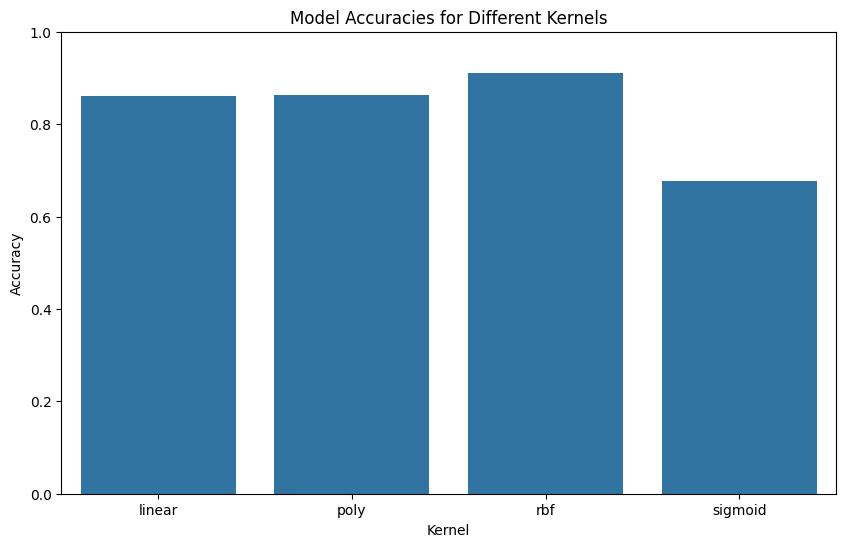

In [17]:
#bar plot of accuracies
plt.figure(figsize=(10,6))
sns.barplot(x=kernels, y=accuracies)
plt.title('Model Accuracies for Different Kernels')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.ylim(0,1)

# Regression

In [18]:
df = pd.read_csv('real_estate_dataset.csv')
df = df.drop(columns=['ID'])
df.head()

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


In [19]:
X = df.drop(columns=['Price'])
y = df['Price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = []
predictions = []
rmse_scores = []
for kernel in kernels:
    if kernel == 'poly':
        model = svm.SVR(kernel=kernel, degree=3)
    else:
        model = svm.SVR(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    models.append(model)
    predictions.append(y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)
    print(f"Kernel: {kernel}, RMSE: {rmse:.4f}")

Kernel: linear, RMSE: 124655.0511
Kernel: poly, RMSE: 124906.4165
Kernel: rbf, RMSE: 124905.3057
Kernel: sigmoid, RMSE: 124890.2832


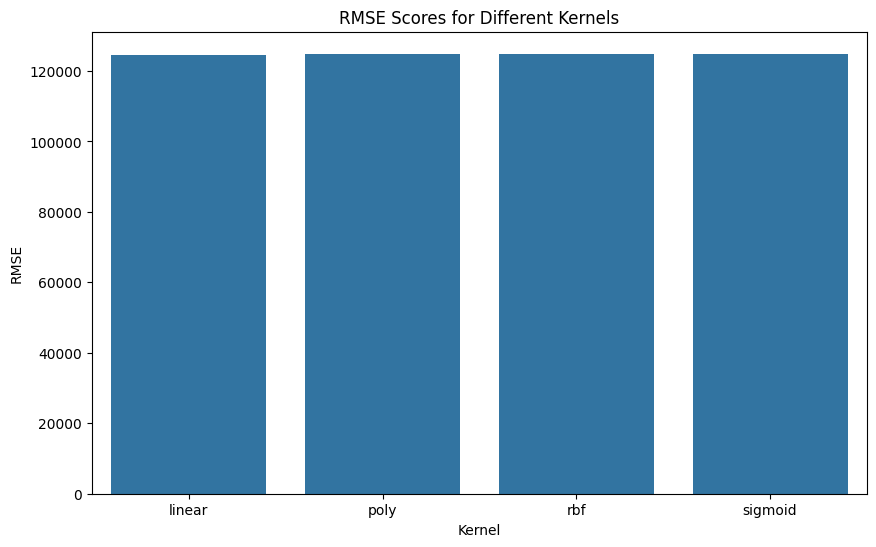

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=kernels, y=rmse_scores)
plt.title('RMSE Scores for Different Kernels')
plt.xlabel('Kernel')
plt.ylabel('RMSE')
plt.show()